<a href="https://colab.research.google.com/github/Keer98/GenAI/blob/master/TrafficDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

#Loading Dataset

In [326]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', delimiter=',')
print(df.head())

   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  
0    scattered clouds  02-10-2012 09:00  
1       broken clouds  02-10-2012 10:00  
2     overcast clouds  02-10-2012 11:00  
3     overcast clouds  02-10-2012 12:00  
4       broken clouds  02-10-2012 13:00  


#Shape Of the Data

In [327]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print(df.info())

Number of rows: 48204
Number of columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


#Dealing with Null Values

In [328]:
non_null_holiday = df[df['holiday'].notnull()]
print(non_null_holiday)


       traffic_volume           holiday     temp  rain_1h  snow_1h  \
126               455      Columbus Day  273.080     0.00      0.0   
1123             1000      Veterans Day  288.120     0.00      0.0   
1370              919  Thanksgiving Day  278.540     0.00      0.0   
2360              803     Christmas Day  264.400     0.00      0.0   
2559             1439     New Years Day  263.490     0.00      0.0   
...               ...               ...      ...      ...      ...   
44441            1088      Memorial Day  299.487     0.00      0.0   
45547            1021  Independence Day  297.550     0.00      0.0   
46936             596        State Fair  289.020     0.00      0.0   
47330             962         Labor Day  292.430     0.25      0.0   
47331             962         Labor Day  292.430     0.25      0.0   

       clouds_all weather_main weather_description         date_time  
126            20       Clouds          few clouds  08-10-2012 00:00  
1123           87

In [329]:
#df= df.drop(['holiday'],axis=1) #axis =0 -> row,axis = 1 -> column
#df['holiday'].fillna('No Holiday', inplace=True)
df['holiday'] = df['holiday'].fillna('No Holiday')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [330]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Number of null values in '{column}': {null_count}")

Number of null values in 'traffic_volume': 0
Number of null values in 'holiday': 0
Number of null values in 'temp': 0
Number of null values in 'rain_1h': 0
Number of null values in 'snow_1h': 0
Number of null values in 'clouds_all': 0
Number of null values in 'weather_main': 0
Number of null values in 'weather_description': 0
Number of null values in 'date_time': 0


In [331]:
df['date_time']=pd.to_datetime(df['date_time'],format='mixed')
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df['date'] = df['date_time'].dt.date

df.drop('date_time',axis=1,inplace = True)
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour,date
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,Friday,2,2012,9,2012-02-10
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,10,2012-02-10
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,11,2012-02-10
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,12,2012-02-10
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,13,2012-02-10


In [332]:
df.groupby('day')['traffic_volume'].mean().sort_values(ascending=False)

,traffic_volume
day,
Thursday,3492.193285
Friday,3489.359713
Wednesday,3488.234579
Tuesday,3421.878059
Monday,3306.017605
Saturday,2915.972945
Sunday,2700.682699


In [333]:
df.groupby('hour')['traffic_volume'].mean().sort_values()

,traffic_volume
hour,
3,371.090864
2,388.353640
1,516.449000
4,702.551889
0,834.781051
23,1469.135294
5,2094.573437
22,2199.405717
21,2668.940464


In [334]:
# Define a function to categorize hours into time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

traffic_by_time_of_day_day = df.groupby(['time_of_day', 'day'])['traffic_volume'].mean().unstack()
#traffic_by_time_of_day_day['Average'] = traffic_by_time_of_day_day.mean(axis=1)
#traffic_by_time_of_day_day_sorted = traffic_by_time_of_day_day.sort_values(by='Average', ascending=False)
print(traffic_by_time_of_day_day)

#traffic_by_hour_day = df.groupby(['hour', 'day'])['traffic_volume'].mean().reset_index()
#print(traffic_by_hour_day)

day                 Friday       Monday     Saturday       Sunday  \
time_of_day                                                         
Afternoon      5329.105388  5146.090189  4678.686813  4510.840047   
Early Morning   863.687326   847.876586   743.965595   730.734994   
Evening        3628.086605  3311.589595  3401.510563  3244.764268   
Morning        4878.533597  4748.067691  3454.029395  3052.752408   
Night          2341.206294  1823.633143  2439.275208  1939.258373   

day               Thursday      Tuesday    Wednesday  
time_of_day                                           
Afternoon      5344.967301  5312.820652  5363.530769  
Early Morning   861.531755   837.227535   863.086758  
Evening        3580.676744  3480.301683  3559.471006  
Morning        4953.758338  4850.835227  5001.115210  
Night          2184.268743  2049.127273  1976.120187  


In [335]:
traffic_by_time_of_day_day.reset_index(inplace=True)
melted_df = traffic_by_time_of_day_day.melt(id_vars='time_of_day', var_name='day', value_name='traffic_volume')
fig = px.line(melted_df, x='time_of_day', y='traffic_volume', color='day', markers=True,
              title='Average Traffic Volume by Time of Day and Day of Week')

fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Average Traffic Volume',
)

fig.show()


In [336]:
df.groupby('holiday')['traffic_volume'].mean().sort_values()

,traffic_volume
holiday,
Columbus Day,519.400000
Martin Luther King Jr Day,612.666667
State Fair,634.800000
Washingtons Birthday,635.200000
Veterans Day,691.400000
Christmas Day,827.500000
Thanksgiving Day,933.500000
Labor Day,1013.142857
Independence Day,1076.000000


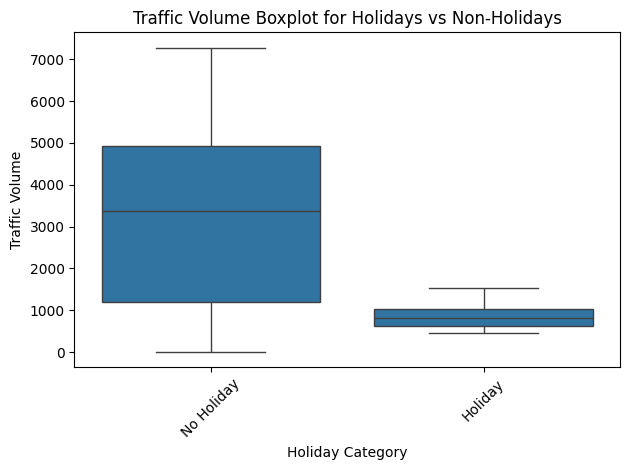

In [337]:
df['holiday'] = df['holiday'].apply(lambda x: 'No Holiday' if x=='No Holiday' else 'Holiday')
sns.boxplot(x='holiday', y='traffic_volume', data=df)

# Customize the plot
plt.title('Traffic Volume Boxplot for Holidays vs Non-Holidays')
plt.xlabel('Holiday Category')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

In [338]:
df['temp']=df['temp'].apply(lambda x:x-273.15)


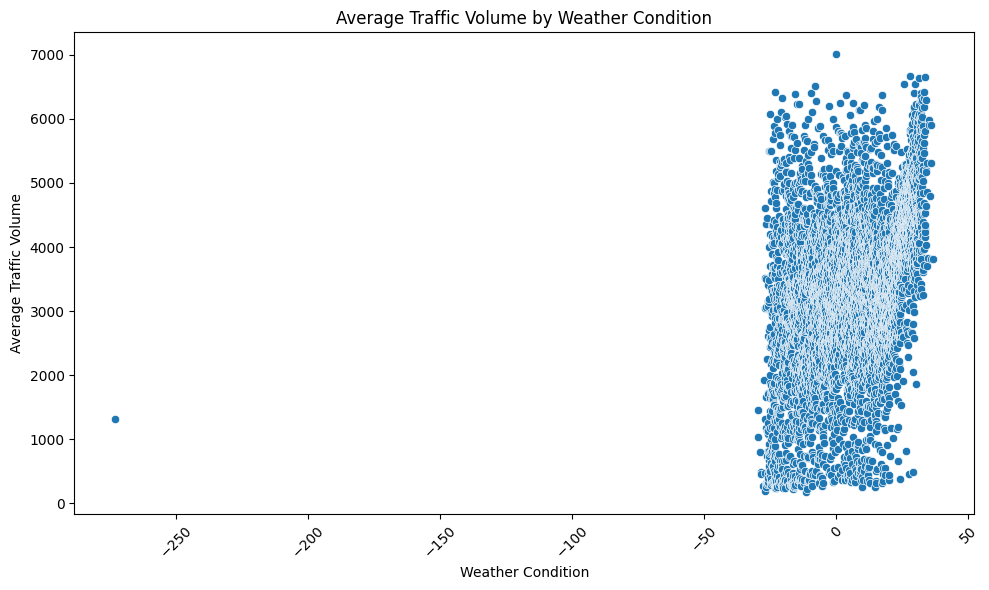

In [339]:
avg_traffic_by_weather = df.groupby('temp')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='traffic_volume', data=avg_traffic_by_weather)



plt.title('Average Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Volume')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [340]:
print(df.shape)
#drop the rows which has temp=0
rows_to_drop = df[df['temp'] == 0].index
print(len(rows_to_drop))
df = df.drop(rows_to_drop)
print(df.shape)

(48204, 14)
42
(48162, 14)


In [341]:
df.groupby('weather_main')['traffic_volume'].mean().sort_values()


,traffic_volume
weather_main,
Squall,2061.750000
Fog,2704.041712
Mist,2932.443827
Thunderstorm,3001.620890
Snow,3019.495640
Clear,3055.315031
Smoke,3237.650000
Drizzle,3290.727073
Rain,3317.981308


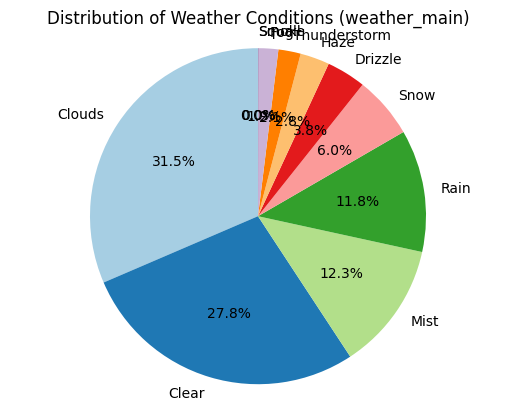

In [342]:
weather_counts = df['weather_main'].value_counts()

plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribution of Weather Conditions (weather_main)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [343]:
df.snow_1h.value_counts()

,count
snow_1h,
0.00,48099
0.05,14
0.06,12
0.51,6
0.25,6
0.13,6
0.10,6
0.32,5
0.17,3


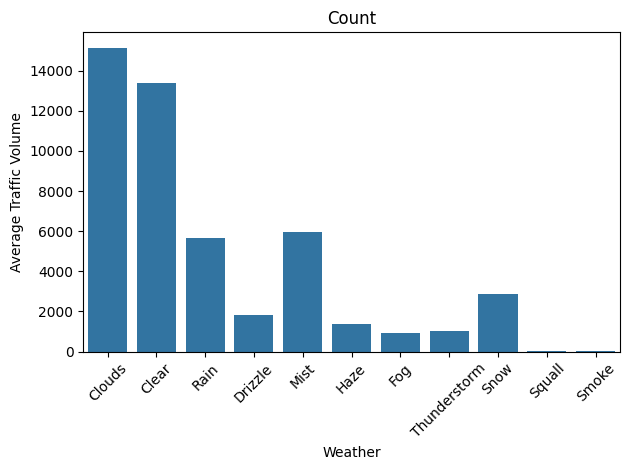

In [344]:
sns.countplot(x='weather_main', data=df)

plt.title('Count')
plt.xlabel('Weather')
plt.ylabel('Average Traffic Volume')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Axes: >

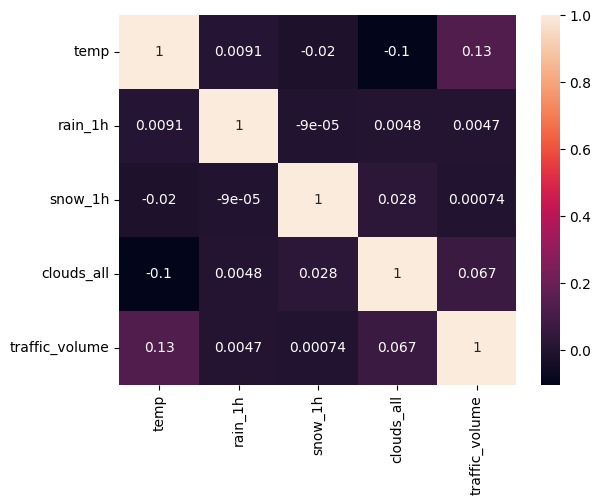

In [345]:
df_weather=df[['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']]
#print(df_weather.head())
sns.heatmap(df_weather.corr(), annot=True)